 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [656]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

In [657]:

whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col= "Date", infer_datetime_format=True, parse_dates=True)

sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

sp500_history.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [716]:
# Reading whale returns
whale_returns_clean = whale_returns.dropna()

whale_returns_clean.drop_duplicates()
whale_returns_clean.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [659]:
# Finding out if there are any null values
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [660]:
# Count nulls
print(whale_returns.isnull().sum())
print(whale_returns[whale_returns.isnull().any(axis = 1)])

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64
            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  


In [661]:
# Drop nulls
whale_returns_clean = whale_returns.dropna()
whale_returns_clean.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [662]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
# algo_return. describe()
algo_returns. sort_index(ascending=True, inplace=True)
algo_returns. head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [663]:
#drop nulls
algo_returns_clean = algo_returns.dropna()

In [664]:
# Count nulls
#print(algo_returns.isnull().sum())
#print(algo_returns[algo_returns.isnull().any(axis = 1)])
algo_returns_clean.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [665]:
# Reading S&P 500 Closing Prices
sp500_history.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [666]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [667]:
# Fix Data Types
sp500_history["Close"]= sp500_history["Close"].str.replace('$','')
#.astype("float")
#sp500_history.sort_index(inplace = True)
#sp500_history
#sp500_history['Close'] = sp500_history['Close'].str.replace('$', '')

In [668]:
# Calculate Daily Returns
#sp500_daily_returns = sp500_history.pct_change()
#sp500_daily_returns.head()
daily_returns_sp500 = sp500_history.astype(float).pct_change()
daily_returns_sp500.sort_index()
daily_returns_sp500.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [669]:
# Drop nulls
daily_returns_sp500.dropna()
daily_returns_sp500.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [670]:
# Rename Column
daily_returns_sp500 = daily_returns_sp500.rename(columns={
    "Close": "S&P 500",})
daily_returns_sp500.head()

,S&P 500
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


## Combine Whale, Algorithmic, and S&P 500 Returns

In [671]:
# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat([whale_returns_clean, algo_returns_clean, daily_returns_sp500], axis="columns", join="inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

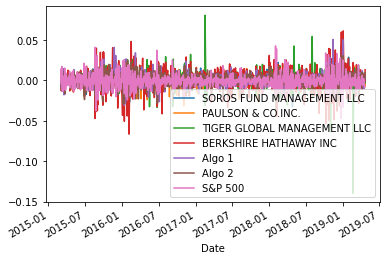

In [672]:
# Plot daily returns
combined_df.plot()

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2019-04-16                   1.160965            0.786811   
2019-04-17                   1.157602            0.781723   
2019-04-18                   1.159278            0.782678   
2019-04-22                   1.156280            0.776939   
2019-04-23                   1.164568            0.779646   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2019-04-16                     0.862080                1.526861  1.944990   
2019-04-17                     0.858279                1.531781  1.924954   
2019-04-18                     0.858778                1.534716  1.923823   
2019-04-22                     0.855652                1.533046  1.925124   
2019-04-23                     0.861189                1.553401  1.934691   

              Algo 2   S&P 500  

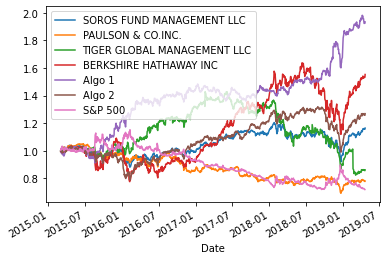

In [673]:
# Plot cumulative returns
cumulative_returns = (1 + combined_df).cumprod()
cumulative_returns.plot()
print(cumulative_returns.tail())

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

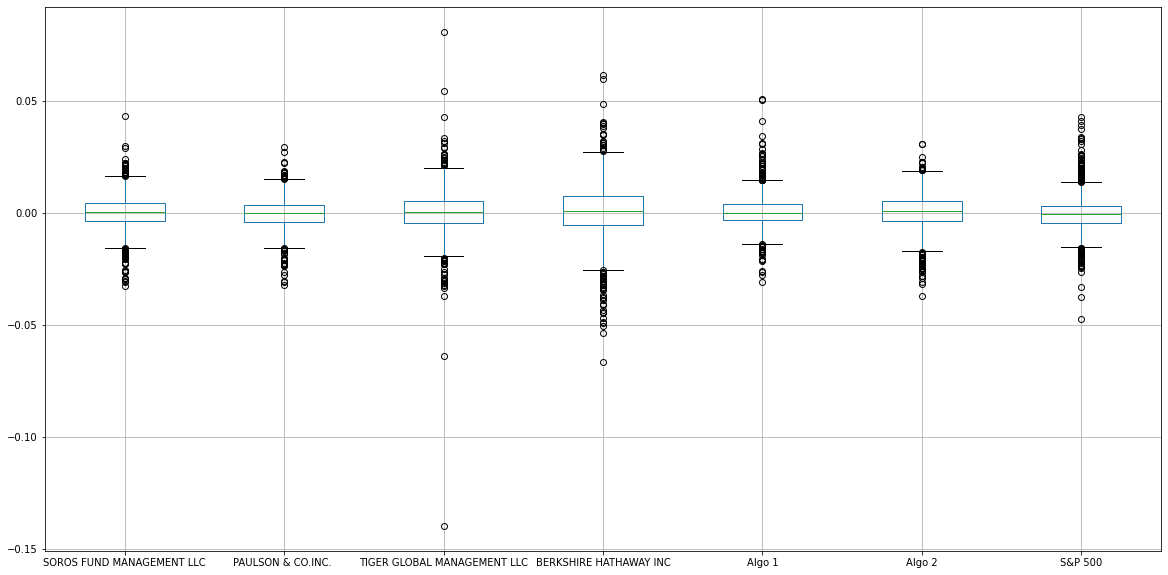

In [674]:
# Box plot to visually show risk
combined_df.boxplot(figsize=(20,10))

In [675]:
# Daily Standard Deviations
combined_df.std()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008587
dtype: float64

In [676]:
# Calculate the standard deviation for each portfolio
annualized_variance = (combined_df.var()*252)
annualized_std = np.sqrt(annualized_variance)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.136313
dtype: float64

# Which portfolios are riskier than the S&P 500?
There are two Portfolios that are riskier than the S&P 500. TIGER GLOBAL MANAGEMENT LLC    0.010894 and
BERKSHIRE HATHAWAY INC         0.012919

In [677]:
# Determine which portfolios are riskier than the S&P 500
#higher_std = df_daily_std[df_daily_std["std"] > df_daily_std.loc["S&P 500", "std"]]
#higher_std

# Determine which portfolios are riskier than the S&P 500
There are two Portfolios that are riskier than the S&P 500. Tiger Global Management(0.0109) and Berkshire Hathaway(0.0130) have higher
standard deviations than the S&P(0.009)

In [678]:
# Calculate the annualized standard deviation (252 trading days)
annualized_variance = (combined_df.var()*252)
annualized_std = np.sqrt(annualized_variance)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.136313
dtype: float64

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

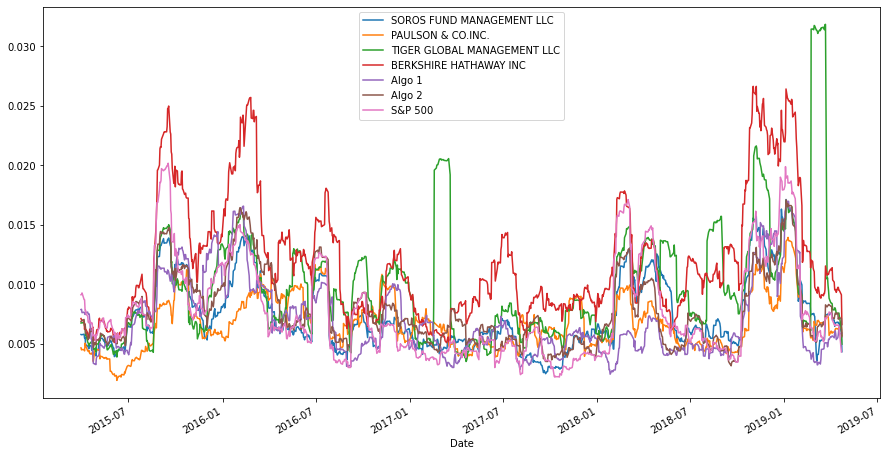

In [679]:
# Calculate and plot the rolling standard deviation for
combined_df.rolling(window=21).std().plot(figsize=(15,8))

In [680]:
# Construct a correlation table
correlation = combined_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.000574
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,-0.001505
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,-0.013856
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,-0.033963
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


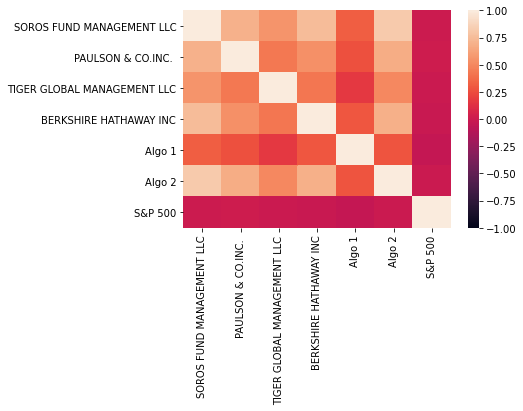

In [681]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
sns.heatmap(correlation, vmin=-1, vmax=1,)

In [682]:
#Caluculating Beta for Algo 1 
covariance = combined_df['Algo 1'].cov(combined_df['S&P 500'])
covariance

-2.223042551715527e-06

In [683]:
variance = combined_df['Algo 1'].var()
variance

5.806747800961455e-05

In [684]:
Algo1_beta = covariance / variance
Algo1_beta

-0.03828377997314513

In [685]:
# Calculate a rolling window using the exponentially weighted moving average. 
rolling_covariance = combined_df['Algo 1'].rolling(window=90).cov(combined_df['S&P 500'])
rolling_variance = combined_df['S&P 500'].rolling(window=90).var()

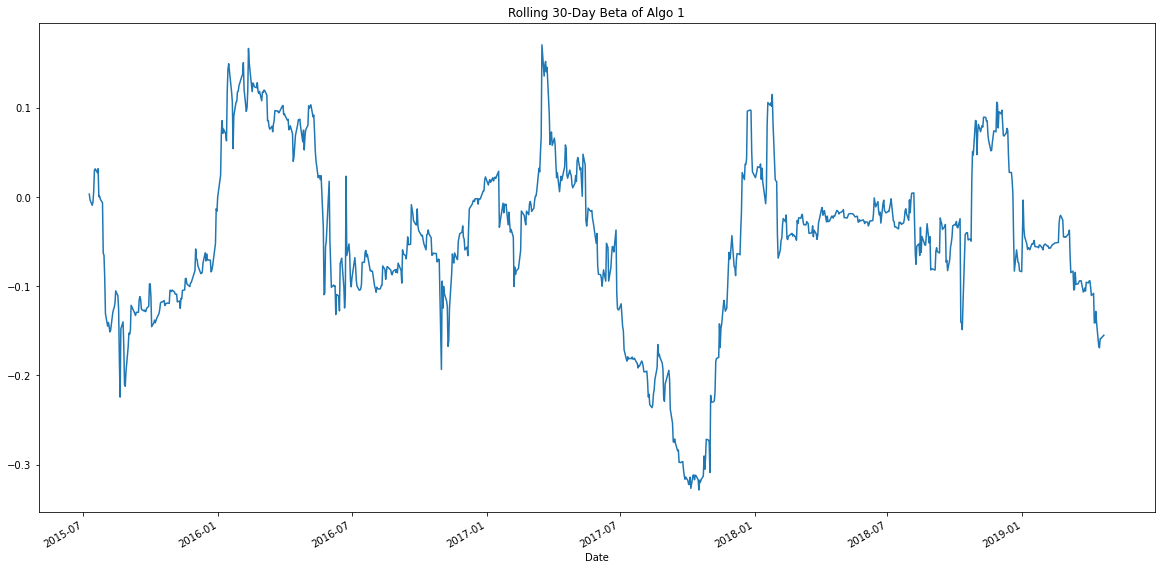

In [686]:
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of Algo 1')

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [687]:
# Calculate annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                       -0.518582
dtype: float64

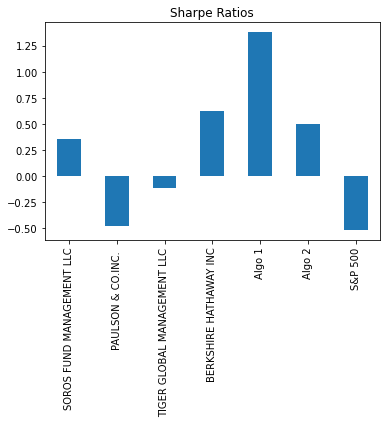

In [688]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

Only Algo 1 one seems to be outperforming the others in this instance. Algo 2 is performing at a lower ratio to S&P500 and BershireHInc. 

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [689]:
# Read the FIRST STOCK, PayPAl: 
# NOTE: I initally had allot of difficulty breaking out the stock closing time.
# 1. I initially attempted to do it in the CSV file itself but could not as the options I applied kep the time stamp embedded. 
# 2. Eventually I managed, with some guidance to put together the following code to seperate and clean up the data. 
pypl_csv = Path("C:/Users/hatti/GWU_Bootcamp/03-Python-Pandas/Homework/Instructions/Starter_Code/Resources/pypl_history.csv")

In [690]:
pypl_csv_new = Path("C:/Users/hatti/GWU_Bootcamp/03-Python-Pandas/Homework/Instructions/Starter_Code/Resources/pypl_history.csv")
#pypl_df_new = pd.read_csv(pypl_csv, index_col="Date", infer_datetime_format=True, parse_dates=True) # date- index
pypl_df_new_1 = pd.read_csv(pypl_csv)

In [691]:
pypl_df_new_1.head()

,Date,Close
0,1/2/2020 16:00,110.75
1,1/3/2020 16:00,108.76
2,1/6/2020 16:00,110.17
3,1/7/2020 16:00,109.67
4,1/8/2020 16:00,111.82


In [692]:
pypl_df_new_1['Date'] = pd.to_datetime(pypl_df_new_1['Date'])
pypl_df_new_1['Date'].head()
pypl_df_new_1["Date"] = pypl_df_new_1["Date"].dt.strftime("%Y-%m-%d")

In [693]:
pypl_df_new_1['Date'].head()
pypl_df_new_1 = pypl_df_new_1.set_index('Date')

In [694]:
pypl_df_new_1

,Close
Date,
2020-01-02,110.75
2020-01-03,108.76
2020-01-06,110.17
2020-01-07,109.67
2020-01-08,111.82
...,...
2020-10-05,196.85
2020-10-06,191.66
2020-10-07,194.61


In [695]:
# Read the SECOND STOCK = SouthWest Airlines.   
luv_csv = Path("C:/Users/hatti/GWU_Bootcamp/03-Python-Pandas/Homework/Instructions/Starter_Code/Resources/luv_history.csv")

In [696]:
luv_csv_new = Path("C:/Users/hatti/GWU_Bootcamp/03-Python-Pandas/Homework/Instructions/Starter_Code/Resources/luv_history.csv")
luv_df_new_1 = pd.read_csv(luv_csv)

In [697]:
luv_df_new_1.head()

,Date,Close
0,1/2/2020 16:00,54.84
1,1/3/2020 16:00,54.35
2,1/6/2020 16:00,54.13
3,1/7/2020 16:00,54.29
4,1/8/2020 16:00,54.37


In [698]:
luv_df_new_1['Date'] = pd.to_datetime(luv_df_new_1['Date'])
luv_df_new_1['Date'].head()
luv_df_new_1["Date"] = luv_df_new_1["Date"].dt.strftime("%Y-%m-%d")

In [699]:
luv_df_new_1['Date'].head()
luv_df_new_1 = luv_df_new_1.set_index('Date')

In [700]:
luv_df_new_1

,Close
Date,
2020-01-02,54.84
2020-01-03,54.35
2020-01-06,54.13
2020-01-07,54.29
2020-01-08,54.37
...,...
2020-10-05,38.49
2020-10-06,37.58
2020-10-07,38.59


In [701]:
# Read the THIRD STOCK, Starbucks 
sbux_csv = Path("C:/Users/hatti/GWU_Bootcamp/03-Python-Pandas/Homework/Instructions/Starter_Code/Resources/sbux_history.csv")

In [702]:
sbux_csv_new = Path("C:/Users/hatti/GWU_Bootcamp/03-Python-Pandas/Homework/Instructions/Starter_Code/Resources/sbux_history.csv")
#pypl_df_new = pd.read_csv(pypl_csv, index_col="Date", infer_datetime_format=True, parse_dates=True) # date- index
sbux_df_new_1 = pd.read_csv(sbux_csv)

In [703]:
sbux_df_new_1.head()

,Date,Close
0,1/2/2020 16:00,89.35
1,1/3/2020 16:00,88.83
2,1/6/2020 16:00,88.13
3,1/7/2020 16:00,87.86
4,1/8/2020 16:00,88.88


In [704]:
sbux_df_new_1['Date'] = pd.to_datetime(sbux_df_new_1['Date'])
sbux_df_new_1['Date'].head()
sbux_df_new_1["Date"] = sbux_df_new_1["Date"].dt.strftime("%Y-%m-%d")

In [705]:
sbux_df_new_1['Date'].head()
sbux_df_new_1 = sbux_df_new_1.set_index('Date')

In [706]:
sbux_df_new_1

,Close
Date,
2020-01-02,89.35
2020-01-03,88.83
2020-01-06,88.13
2020-01-07,87.86
2020-01-08,88.88
...,...
2020-10-05,88.47
2020-10-06,87.01
2020-10-07,88.45


In [733]:
# Concatenate all stocks into a single DataFrame
combined_pt2 = pd.concat([luv_df_new_1, sbux_df_new_1, pypl_df_new_1], axis='columns', join='inner')
combined_pt2.head()
print(combined_pt2)

            Close  Close   Close
Date                            
2020-01-02  54.84  89.35  110.75
2020-01-03  54.35  88.83  108.76
2020-01-06  54.13  88.13  110.17
2020-01-07  54.29  87.86  109.67
2020-01-08  54.37  88.88  111.82
...           ...    ...     ...
2020-10-05  38.49  88.47  196.85
2020-10-06  37.58  87.01  191.66
2020-10-07  38.59  88.45  194.61
2020-10-08  38.99  89.53  193.06
2020-10-09  39.73  90.01  197.27

[196 rows x 3 columns]


In [708]:
# Reset the index
combined_pt2.sort_index(inplace=True)
combined_pt2.head()

,Close,Close,Close
Date,,,
2020-01-02,54.84,89.35,110.75
2020-01-03,54.35,88.83,108.76
2020-01-06,54.13,88.13,110.17
2020-01-07,54.29,87.86,109.67
2020-01-08,54.37,88.88,111.82


In [734]:
# Drop Nulls
combined_pt2.dropna()
combined_pt2.head()

,Close,Close,Close
Date,,,
2020-01-02,54.84,89.35,110.75
2020-01-03,54.35,88.83,108.76
2020-01-06,54.13,88.13,110.17
2020-01-07,54.29,87.86,109.67
2020-01-08,54.37,88.88,111.82


In [735]:
#Daily Returns
daily_returns = combined_pt2.pct_change()
daily_returns.head()

,Close,Close,Close
Date,,,
2020-01-02,NaN,NaN,NaN
2020-01-03,-0.008935,-0.005820,-0.017968
2020-01-06,-0.004048,-0.007880,0.012964
2020-01-07,0.002956,-0.003064,-0.004538
2020-01-08,0.001474,0.011609,0.019604


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [737]:
# Calculate weighted portfolio returns
#weights = [1/3, 1/3, 1/3]
weights = [1/3, 1/3, 1/3]
combined_pt2 = daily_returns.dot(weights)

custom = pd.DataFrame(portfolio_returns)
custom.head()

,0
Date,
2020-01-02,NaN
2020-01-03,-0.010908
2020-01-06,0.000345
2020-01-07,-0.001549
2020-01-08,0.010896


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [739]:
combined_pt3 = pd.concat([daily_returns, combined_df], axis='columns', join='inner')
combined_pt3.rename(columns= {0: "Custom"},inplace = True )
combined_pt3.dropna(inplace=True)
combined_pt3.sort_index()
combined_pt3.head()

,Close,Close,Close,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,,,,


In [740]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
combined_pt3.std()
annualized_variance_pt2 = (combined_pt3.var()*365)
annualized_std_pt2 = np.sqrt(annualized_variance_pt2)
annualized_std_pt2

Close                         NaN
Close                         NaN
Close                         NaN
SOROS FUND MANAGEMENT LLC     NaN
PAULSON & CO.INC.             NaN
TIGER GLOBAL MANAGEMENT LLC   NaN
BERKSHIRE HATHAWAY INC        NaN
Algo 1                        NaN
Algo 2                        NaN
S&P 500                       NaN
dtype: float64

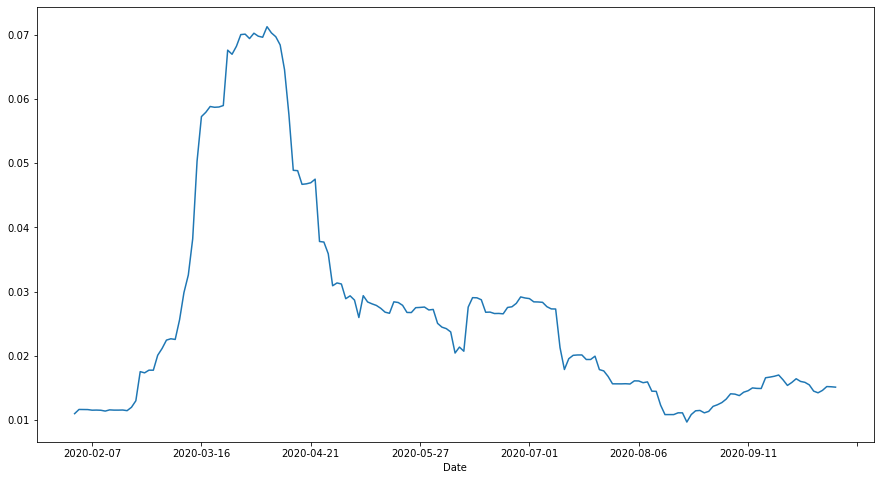

In [741]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_df1.std()
annualized_variance_pt2 = (combined_df1.var()*365)
annualized_std_pt2 = np.sqrt(annualized_variance_pt2)
annualized_std_pt2
combined_pt2.rolling(window=21).std().plot(figsize=(15,8))

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [745]:
# Risk
rolling_variance = combined_pt2['custom'].rolling(window=21).var()
rolling_covariance = combined_pt2['custom'].rolling(window=21).cov(combined_pt2['S&P 500'])
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='custom Beta')

KeyError: 'custom'

In [ ]:
# Rolling
my_stock_df.ewm(halflife=21).std().plot(figsize=(10,10))

In [ ]:
# Annualized Sharpe Ratios
sharpe_ratios = (my_stock_df.mean() * 200) / (my_stocks_df.std() * np.sqrt(200))
sharpe_ratios

In [ ]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [ ]:
# Create a correlation analysis
correlation = combined_df.corr()
correlation

In [ ]:
# Beta
# Calculate 30-day rolling variance of luv_histroy vs. pypl_history vs. sbux_history and plot the data
rolling_variance = returns['luv_history', 'pypl_history', 'sbux_history'].rolling(window=30).var()
#rolling_variance.plot(figsize=(20, 10), title='Rolling 30-Day Variance My Stocks')
# Calculate 30-day rolling beta of My Stocks and plot the data
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of My Stocks')